# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> 2do parcial, 2021</center>           

La duración del parcial es de 3 horas. El parcial consta de 3 ejercicios, cuya suma total es de 100 puntos. El parcial es sin material y no está permitido acceder a Internet. Ante cualquier duda comuníquese con los docentes. 

Este notebook corresponde al ejercicio 1. Hay un notebook por ejercicio planteado.

* [Ejercicio 1 - Redes Neuronales](#Ejercicio1) (35 puntos)

In [1]:
# Se importan las bibliotecas que se utilizarán
import numpy as np
import matplotlib.pyplot as plt

from fuaa_utils_ej1 import validar_resultado
from fuaa_utils_ej1 import error_relativo
from fuaa_utils_ej1 import calcular_gradiente_numerico_array
from fuaa_utils_ej1 import calcular_gradiente_numerico
from fuaa_utils_ej1 import mostrar_ajuste
from fuaa_utils_ej1 import identificar_parcial

%matplotlib inline
#%matplotlib notebook
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

identificar_parcial()

Usuario julian.o.flaherty en pcunix152.fing.edu.uy.


<a id="Ejercicio1"></a>
## Ejercicio 1: Red neuronal de tres capas para predecir calidad del vino


## Descripción del ejercicio

En este ejercicio se implementarán algunos de los bloques constitutivos de una red neuronal de **tres capas**. La siguiente figura muestra el diagrama de bloques de la red que se implementará. 

<img src="img/red_tres_capas.png" alt="drawing" width="800"/>

A continuación se describen los bloques:
- **Inicializar parámetros:** Inicializa los parámentros de la red. A los pesos de la capa $l$ de la red les llamaremos $W_l$, $b_l$ con $l=1,2,3$. 
- **Propagación hacia adelante:** La *propagación hacia adelante*  o *forward propagation* consiste en estimar la salida de la red a partir de la entrada. Cada nodo o capa de la red tiene un método *forward* asociado. Se proveen las implementaciones de los métodos forward asociados a los siguientes bloques:
        - Afin
        - Activación 
        - Afin --> Activación
        
- **Loss:** Calcula el valor de la función de costo a optimizar. Se implementará como función de costo:
        - Mean Square Error
- **Propagación hacia atrás:** Durante la *propagación hacia atrás* o *backpropagation* se calculan los gradientes necesarios para actualizar los parámetros de la red. Se implementarán métodos *backward* para los siguientes bloques:
        - Afin
        - Activación 
        - Afin --> Activación
- **Update:** Es el boque encargado de actualizar los parámetros. Para ello utiliza los gradientes calculados durante la *propagación hacia atrás* y un método de optimización. Se utilizará *descenso por gradiente* como método de optimización.

## 1- Bloque de Inicialización

Se implementará el bloque de inicialización para el caso de una red neuronal de **tres capas** con la siguiente estructura:    
  Afin --> Activación 1 --> Afin --> Activacion 2 --> Afin --> Activación 3       

### Parte a) 
Completar la implementación de `inicializar_pesos()`. Los pesos $W_l$ serán inicializados en valores aleatorios con distribución gaussiana de desviación estandar $\sigma_l=1/\sqrt{d_{l-1}}$, siendo $d_{l-1}$ el número de nodos de la capa $l-1$. Por ejemplo, para la primera capa $l=1$, la cantidad de nodos $d_{l-1}=d_0$ corresponde a la dimensión del vector de características. Los pesos correspondientes a términos de *bias* se inicializarán a cero. 

**Nota:** No necesario realizar una implementación genérica. Alcanza con que funcione para una red de tres capas.

In [2]:
def inicializar_pesos(dims, semilla=1):
    """
    Entrada:
        dims: lista que contiene el número de nodos de cada una de las capas. El primer elemento
              corresponde al tamaño del vector de características y el último a la cantidad de 
              nodos en la última capa oculta.
        semilla: semilla a utilizar para generar los valores aleatorios
    
    Salida:
        parametros: diccionario de python que contiene los parámetros inicializados 
                    parametros['W' + str(l)] = ... 
                    parametros['b' + str(l)] = ...
    """
    
    np.random.seed(semilla)
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    # Sugerencia: puede ser útil utilizar np.randn() y ajustar la desviación estándar
    

    W1 = (1/np.sqrt(dims[0])) * np.random.randn(dims[0], dims[1])    
    W2 = (1/np.sqrt(dims[1])) * np.random.randn(dims[1], dims[2])
    W3 = (1/np.sqrt(dims[2])) * np.random.randn(dims[2], dims[3])
    
    b1 = np.zeros((dims[1]))
    b2 = np.zeros((dims[2]))
    b3 = np.zeros((dims[3]))
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
   
    # Se genera el diccionario con los valores inicializados
    parametros = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2,
                  'W3': W3,
                  'b3': b3}
    
    return parametros    

In [3]:
# Se testea la inicialización con pesos aleatorios
validar_resultado("inicializar_pesos", funcion=inicializar_pesos)

+-------------------------------------------------------------------------+
|               FuAA (2do. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Dimensiones de W1 validadas.
 Dimensiones de b1 validadas.
 Dimensiones de W2 validadas.
 Dimensiones de b2 validadas.
 Dimensiones de W3 validadas.
 Dimensiones de b3 validadas.
 Cálculo de W1 validado.
 Cálculo de b1 validado.
 Cálculo de W2 validado.
 Cálculo de b2 validado.
 Cálculo de W3 validado.
 Cálculo de b3 validado.
+-------------------------------------------------------------------------+


## 2- Bloques Forward

Se proveen las implementaciones de los métodos *forward* de los siguientes bloques: 

- Bloque Afin  
- Bloque Activación donde la activación puede ser ReLU, Sigmoide
- Bloque Afin -> Activación  

### 2.1 - Forward Afin

La señal de entrada a la activación de la capa $\textit{l}$ puede escribirse como:

$$
\mathbf{s}^{(l)}=\left( W^{(l)} \right)^T \mathbf{x}^{(l-1)}+ \mathbf{b}^{(l)}   \tag{1}
$$

donde $\mathbf{s}^{(l)}$ y $\mathbf{b}^{(l)}$ son vectores de tamaño $d^{(l)}$, $\mathbf{x}^{(l-1)}$  es un vector de tamaño $d^{(l-1)}$ y $W^{(l)}$ es una matriz de tamaño $d^{(l-1)} \times d^{(l)}$.

La ecuación (1) es válida cuando la entrada a la capa es un único vector $\mathbf{x}^{(l-1)}$. En la práctica es más habitual procesar un $\textit{batch}$ de vectores de entrada a la vez, por lo tanto es deseable contar con una expresión que genere la salida para todos los vectores de entrada a la vez. Al evitar la utilización de un bloque $\textit{for}$ que itere por cada una de las muestras del $\textit{batch}$ se mejora la eficiencia de la implementación.   


La versión de la ecuación (1) que actúa sobre un conjunto de muestras a la vez es la siguiente:

$$
S^{(l)} = X^{(l-1)}W^{(l)} +b^{(l)}\tag{2}
$$

donde $X^{[0]} = X$, siendo X una matriz que contiene un vector de características en cada fila.

In [4]:
def afin_forward(X, W, b):
    """
    Implementa la propagación hacia adelante en una capa afin.

    Entrada:
        X: matriz de tamaño (N, dim capa anterior) que en cada fila contiene un vector de
           activaciones de la capa anterior (o datos de entrada)
        W: matriz de pesos de tamaño (dim de capa anterior, dim de capa actual) 
        b: vector de bias de tamaño (dim de la capa actual,)

    Salida:
        S: matriz de tamaño (N, dim de capa actual) que contiene
           los scores o señal de entrada a la activación  
        cache: (X, W, b) tupla que contiene X, W y b. 
               Son almacenados para calcular el paso backward eficientemente
    """

    S = np.dot(X, W) + b
    
    assert(S.shape == (X.shape[0], W.shape[1] ))
    cache = (X, W, b)
    
    return S, cache

### 2.2 - Funciones de activación

Se proveen las implementaciones de las siguientes funciones de activación:

- **Sigmoide**: $\sigma(S) = \sigma(X W  + b) = \frac{1}{ 1 + e^{-(X W  + b)}}$. Esta función devuelve, además de la activación resultante, la variable cache que contiene la señal `S` que dio lugar a la activación (se utiilza luego durante la propagación hacia atrás).

``` python
X, cache = sigmoid(S)
```


- **Rectified Linear Unit**:  $ReLU(S) = \max(0, S)$.  Al igual que en el caso de la activación sigmoide, esta función devuelve además de la activación resultante, la variable cache que contiene la señal `S` que dio lugar a la activación (se utiilza luego durante la propagación hacia atrás).

``` python
X, cache = relu(S)
```

In [5]:
def sigmoide(S):
    """
    Implementa la activación sigmoide
    
    Entrada:
        S: arreglo numpy que contiene las entradas a la activación. 
           Las dimensiones de entrada no están definidas.
    
    Salida:
        X: arreglo del mismo tamaño que S que contiene la salida de sigmoide(S) 
    cache: devuelve S para utilizar durante la propagación hacia atrás
    """
    
    X = 1/(1+np.exp(-S))
    cache = S

    assert X.shape == S.shape, 'La entrada y la salida deben ser del mismo tamaño'
    return X, cache

In [6]:
def relu(S):
    '''
    Implementa la activación relu
    
    Entrada:
        S: arreglo numpy que contiene las entradas a la activación. 
           Las dimensiones de entrada no están definidas.
    
    Salida:
        X: arreglo del mismo tamaño que S que contiene la salida de relu(S) 
    cache: devuelve S para utilizar durante la propagación hacia atrás
    '''
    
    X = np.maximum(0,S)
    
    assert(X.shape == S.shape)
    cache = S 
        
    return X, cache

### 2.3 - Aplicación conjunta de capa afin y activación

Se provee la implementación de la propagación hacia adelante de una capa *Afin->Activacion*. El método `afin_activacion_forward()` implementa la operación:

$$
X^{[l]} = \theta(S^{(l)}) = \theta(X^{(l-1)}W^{(l)} +b^{(l)})   \tag{3}
$$

donde la activación $\theta(\cdot)$ será alguna de las implementadas. 

In [7]:
def afin_activacion_forward(X_prev, W, b, activacion):
    """
    Implementa la propagación hacia adelante para una capa Afin->Activación 
    Entrada:
        X_prev: arreglo de tamaño (N, dim capa anterior) que contiene la 
                activación de la capa anterior (o datos de entrada):          
        W: matriz de pesos de tamaño (dim de capa anterior, dim de capa actual)  
        b: vector de bias de tamaño (dim de la capa actual)
        activacion: la activacion a utilizar en esta capa se indica con uno de los 
                    siguientes strings: 'sigmoide' o 'relu'

    Salida:
        X: arreglo de tamaño (N, dim de capa actual) que contiene la salida 
           de la función de activación  
    cache: tupla que contiene "cache_afin" y "cache_activacion".
           Se almacenan para calcular la propagación hacia atrás eficientemente
    """
    

    S, cache_afin = afin_forward(X_prev,W,b)
    
    if activacion == 'sigmoide':    
        
        X, cache_activacion = sigmoide(S)
    
    elif activacion == 'relu':
        
        X, cache_activacion = relu(S)
    
    assert (X.shape == (X_prev.shape[0], W.shape[1]))
    cache = (cache_afin, cache_activacion)

    return X, cache

## 3 - Función de costo

Se implementará la siguiente función de costo:  

- **Error cuadrático medio:** Es la función de costo más utilizada en problemas de regresión. Se recuerda que la misma se define mediante la fórmula:
$$
MSE(\mathbf{x}^{(L)}, \mathbf{y})= \frac{1}{2N} \sum\limits_{n = 1}^{N} \left(y_n - x^{(L)}_n \right)^2 \tag{4}
$$

### Parte b) 
Completar la implementación del método `mse()`.

In [8]:
def mse(xL, y):
    """
    Implementa el error cuadratico medio como función de costo de una red neuronal con una sola capa
    de salida.

    Entrada:
        xL: vector de dimensión (N,1) que contiene las salidas generadas por la red neuronal para N muestras.
        y:  vector de dimensión (N,1) que contiene las salidas esperadas

    Salida:
        costo: escalar con el costo calculado
        dxL: gradiente del costo respecto a xL, tiene las mismas dimensiones que xL
    """
    
    N = len(y)
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

    y = y.reshape((N,1)) # porque a veces no entra como vector
    
    costo = 0.5 * np.mean((y-xL)**2)
    
    dxL = (xL-y)/N
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

    costo = np.squeeze(costo) # Para asegurarnos que la salida sea un escalar (Ej: transforma [[12]] en 12).
    assert(costo.shape == ())
    assert(dxL.shape == xL.shape), 'Las dimensiones de dxL y xL deben ser iguales'
    return costo, dxL

In [9]:
validar_resultado('mse', funcion=mse)

+-------------------------------------------------------------------------+
|               FuAA (2do. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Dimensiones de costo validadas.
 Dimensiones de dxL validadas.
 Cálculo del costo validado.
 Cálculo del gradiente validado.
+-------------------------------------------------------------------------+


## 4 - Propagación hacia atrás

Se implementará la versión *backward* de cada una de las funciones *forward* implementadas anteriormente. A saber:
- AFIN backward
- ACTIVACION backward 
- AFIN -> ACTIVACION backward donde ACTIVACION puede ser *ReLU* o *sigmoide* 

### 4.1 - Afin backward

Durante la propagación hacia adelante en la capa $l$ (sin considerar la activación) se calcula para una muestra: 

$$
\mathbf{s}^{(l)}=\left( W^{(l)} \right)^T \mathbf{x}^{(l-1)}+ \mathbf{b}^{(l)}   \tag{1}
$$

Si se llama $e_n$ al costo debido a la muesta $n$ y se asume conocido el *vector de sensibilidad* $\delta^{(l)}=\frac{\partial e_n}{\partial \mathbf{s}^{(l)}}$, en el teórico del curso se vio que 

$$
\frac{\partial{e_n}}{\partial{W^{(l)}}}=\mathbf{x}^{(l-1)} \left( \delta^{(l)} \right)^T
$$

Análogamente a como se hizo en el caso de la propagación hacia adelante, si se considera la contribución al error de un conjunto de muestras a la vez la ecuación se puede escribir en forma vectorizada como:

$$
\frac{\partial{E}}{\partial{W^{(l)}}}= dW^{(l)} = \left( X^{(l-1)}\right)^ T dS^{(l)}   \tag{5}
$$

donde $dS^{(l)}$ es una matríz de tamaño $N\times d^{(l)}$ que en cada fila contiene el vector de sensibilidad $\delta^{(l)}_n$ correspondiente a una de las muestras.

Las derivadas respecto al vector de bias $\mathbf{b}^{(l)}$ se calculan de forma similar (puede pensarse como un caso particular en que $X^{(l-1)}$ es un vector columna de unos) por lo que

$$
\frac{\partial{E}}{\partial{\mathbf{b}^{(l)}}}= d\mathbf{b}^{(l)} =\mathbb{1} ^ T dS^{(l)}  \tag{6}
$$

Finalmente se calcula la influencia de cada una de las características en el error. Considerando primero el caso de una muestra, se tiene que:

$$
\frac{\partial{e_n}}{\partial{\mathbf{x}^{(l-1)}}} = W^{(l)} \delta^{(l)}
$$

que en forma vectorizada puede escribirse como:

$$ 
 \frac{\partial E }{\partial X^{(l-1)}} = dX^{(l-1)} = dS^{(l)} \left( W^{(l) }\right)^T \tag{7}
$$

### Parte c) 
Implementar el método `afin_backward()`.

In [10]:
def afin_backward(dS, cache):
    """
    Implementa la propagación hacia atrás para una capa l (sin considerar la activación)

    Entrada:
        dS: Gradiente de la función de costo con respecto a la salida de la capa actual 
            (sin considerar la activación)
        cache: tupla de valores (X_prev, W, b) calculados durante la propagación hacia adelante
               de la capa actual

    Salida:
        dX_prev: Gradiente de la función de costo con respecto a la activación de la capa anterior (l-1), 
                 tiene el mismo tamaño que X_prev
        dW: Gradiente de la función de costo con respecto a W (de la capa actual l), 
            tiene el mismo tamaño que W
        db: Gradiente de la función de costo con respecto a b (de la capa actual l), 
            tiene el mismo tamaño que b
    """
    X_prev, W, b = cache
    N = X_prev.shape[0]

    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

    
    dX_prev = dS @ W.T
    
    db =  np.ones(N) @ dS
    
    dW = X_prev.T @ dS
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

    assert (dX_prev.shape == X_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dX_prev, dW, db

In [11]:
validar_resultado('afin_backward', funcion=afin_backward, f_forward=afin_forward)

+-------------------------------------------------------------------------+
|               FuAA (2do. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Dimensión del gradiente respecto a la activación de la capa anterior (dE/dX_prev) validado.
 Dimensión del gradiente respecto a W de la capa actual(dE/dW) validado.
 Dimensión del gradiente respecto a "b" de la capa actual (dE/db) validado.
 Gradiente respecto a la activación de la capa anterior (dE/dX_prev) validado.
 Gradiente respecto a W de la capa actual (dE/dW) validado.
 Gradiente respecto a "b" de la capa actual (dE/db) validado.
+-------------------------------------------------------------------------+


### 4.2 - Activación backward

Si  $\theta(\cdot)$ es la función de activación, entonces su función *backward* se calcula 

$$
dS^{(l)} = dX^{(l)} * \theta'(S^{(l)})   \tag{8}
$$.  

donde $\theta'(\cdot)$ debe ser calculado para cada caso. 

### Parte d) 
Implementar los métodos *backward* cada una de las funciones de activación implementadas

In [12]:
def sigmoide_backward(dX, cache):
    """
    Implementa la propagación hacia atrás de una activación Sigmoide.

    Entrada:
        dX: gradiente de la función de costo respecto a la salida de la capa relu,
              el tamaño del arreglo no está definido
        cache: 'S' valor almacenado durante la propagación hacia adelante

    Salida:
        dS: gradiente del costo respecto a S
    """
    
    S = cache
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    

    dtita = np.exp(-S) / (1+np.exp(-S))**2
    
    dS = dtita * dX
     
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    assert (dS.shape == S.shape), 'dS y S no tienen el mismo tamaño'
    assert (dX.shape == S.shape), 'dX y S no tienen el mismo tamaño'
    
    return dS

In [13]:
validar_resultado('activacion_backward', f_backward=sigmoide_backward, f_forward=sigmoide)

+-------------------------------------------------------------------------+
|               FuAA (2do. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Dimensiones del gradiente respecto a S validadas.
 Cálculo de la salida validado.
+-------------------------------------------------------------------------+


In [14]:
def relu_backward(dX, cache):
    """
    Implementa la propagación hacia atrás de una activación ReLu.

    Entrada:
        dX: gradiente de la función de costo respecto a la salida de la capa relu,
              el tamaño del arreglo no está definido
        cache: 'S' valor almacenado durante la propagación hacia adelante

    Salida:
        dS: gradiene del costo respecto a S
    """
    
    S = cache
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    dRelu = S>0
    dS = dX * dRelu
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    assert (dS.shape == S.shape)
    
    return dS

In [15]:
validar_resultado('activacion_backward', f_backward=relu_backward, f_forward=relu)

+-------------------------------------------------------------------------+
|               FuAA (2do. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Dimensiones del gradiente respecto a S validadas.
 Cálculo de la salida validado.
+-------------------------------------------------------------------------+


### 4.3 - Afin --> Activacion backward

A continuación se implementará la función que realiza la propagación hacia atrás del la capa *Afin-->Activacion*. 

### Parte e) 
Implementar la función `afin_activacion_backward()`. Para ello utilizar las funciones implementadas anteriormente: `afin_backward` y la `activacion_backward` que corresponda. 


In [16]:
def afin_activacion_backward(dX, cache, activacion):
    '''
    Implementar la propagación hacia atrás para la capa Afin->Activacion.
    
    Entradas:
        dX: gradiente del costo respecto a la salida de la capa actual 
        cache: tupla con los valores(cache_afin, cache_activacion) 
        activacion: la activación a utilizar en esta capa, puede ser 'sigmoide' o 'relu'
    Salidas:
        dX_prev: Gradiente del costo con respecto a la activación de la capa anterior(l-1), 
                 tiene las mismas dimensiones que X_prev
        dW -- Gradiente del costo con respecto a W (de la capa actual l), 
              tiene las mismas dimensiones que W
        db -- Gradiente del costo con respecto a b (de la capa actual l), 
              tiene las mismas dimensiones que b
    '''
    cache_afin, cache_activacion = cache
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    if activacion == "sigmoide":
        dS = sigmoide_backward(dX, cache_activacion)
    elif activacion == "relu":
        dS = relu_backward(dX, cache_activacion)
    
    dX_prev, dW, db = afin_backward(dS, cache_afin)
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    return dX_prev, dW, db

In [17]:
validar_resultado('afin_activacion_backward', f_backward=afin_activacion_backward, f_forward=afin_activacion_forward)

+-------------------------------------------------------------------------+
|               FuAA (2do. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Cálculo del grandiente respecto a dX (relu) validado.
 Cálculo del grandiente respecto a dW (relu) validado.
 Cálculo del grandiente respecto a db (relu) validado.
 Cálculo del grandiente respecto a dX (sigmoide) validado.
 Cálculo del grandiente respecto a dW (sigmoide) validado.
 Cálculo del grandiente respecto a db (sigmoide) validado.
+-------------------------------------------------------------------------+


##  5 - Actualización de los parámetros

En esta sección se actualizarán los parámetros del modelo mediante el método de *descenso por gradiente*:

$$ W^{(l)} = W^{(l)} -\eta \text{ } dW^{(l)} \tag{9}$$
$$ \mathbf{b}^{(l)} = \mathbf{b}^{(l)} -\eta \text{ } \mathbf{db}^{(l)} \tag{10}$$

donde $\eta$ es el *learning rate*. 

### Parte f) 
Implementar `actualizar_parametros()` para actualizar los parámetros usando *descenso por gradiente*. Luego de actualizar los parámetros, almacenarlos en el diccionario de parámetros. 

In [18]:
def actualizar_parametros(parametros, gradientes, learning_rate):
    """
    Se actualizan los parámetros utilizando descenso por gradiente. Si bien en este notebook se trabaja 
    con una red de tres capas, el método se implementa en forma genérica para mostrar como se haría en el
    caso más general.
    
    Entrada:
        parametros: diccionario de python que contiene los parámetros 
                        parametros["W" + str(l)] = ... 
                        parametros["b" + str(l)] = ...
        gradientes: diccionario de python que contiene los gradientes 
                    (las salidas de los métodos backward)
                        gradientes["W" + str(l)] = ... 
                        gradientes["b" + str(l)] = ...
    
    Salida:
        parametros: diccionario de python que contiene los parámetros actualizados 
                    parametros["W" + str(l)] = ... 
                    parametros["b" + str(l)] = ...
    """
    
    L = len(parametros) // 2 # número de capas en la red neuronal
    
    # Se actualiza cada uno de los parámetros. En el caso de una red profunda de L capas
    # se hace con un loop que va recorriendo cada parámetro
    for l in range(1,L+1):
        
        ####################################################################################
        ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
        ####################################################################################
        
        parametros["W" + str(l)] = parametros["W" + str(l)] - learning_rate * gradientes["W" + str(l)]
        parametros["b"+str(l)] = parametros["b" + str(l)] - learning_rate * gradientes["b" + str(l)]
        
        
        ####################################################################################
        ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
        ####################################################################################
    
    return parametros

# Predicción de la calidad del vino

Se utilizarán los bloques implementados anteriormente para entrenar una red neuronal que estime la calidad de una variante de *vino tinto* en función de propiedades químicas de los mismos. Se cuenta con un conjunto de datos etiquetados por expertos con valores que se encuentran en el rango 0 (pésima calidad) a 10 (excelente calidad). La calificación asociada a cada muestra corresponde al promedio de calificaciones de tres expertos. Los datos fueron obtenidos de la plataforma [Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).

In [19]:
features_names = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                  'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

In [20]:
data = np.loadtxt('wine/winequality-red.csv', skiprows = 1, delimiter=',')

La siguiente celda muestra los histogramas de las características y de la calidad (última gráfica). Observar que el rango efectivo de calidades es [3, 8].

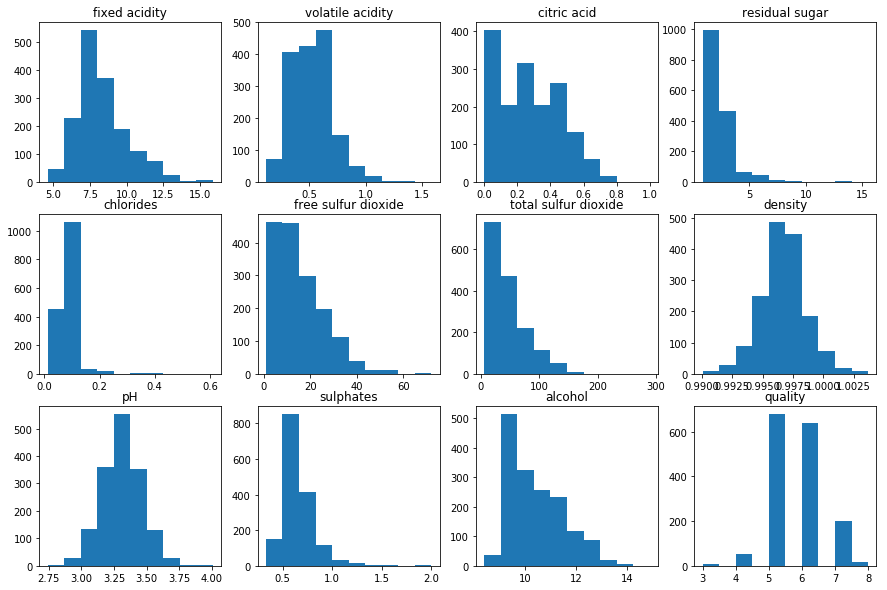

In [21]:
plt.figure(figsize=(15,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.hist(data[:,i])
    plt.title(features_names[i])

Se separan los datos disponibles en dos conjuntos, uno de entrenamiento con dos tercios de los datos datos disponibles y otro de validación con el tercio restante.

In [22]:
X = data[:,:11]
y = data[:,11]
N = len(X)
indices = np.random.permutation(N)
indices_train = indices[:2*N//3]
indices_val = indices[2*N//3:]
X_train = X[indices_train]
X_val = X[indices_val]
y_train = y[indices_train, None]
y_val = y[indices_val, None]
print('El conjunto de entrenamiento tiene %d muestras y el de validación %d muestras'  % (len(X_train), len(X_val)))

El conjunto de entrenamiento tiene 1066 muestras y el de validación 533 muestras


### Parte g) 

Se aplicará como técnica de preprocesamiento la *estandarización* de los datos. Para ello completar: i) la implementación del método `estandarizar_caracteristicas()` y ii) el código de la celda que realiza la estandarización. 

In [23]:
def estandarizar_caracteristicas(X, mu_sigma = None):
    '''
    Entrada:
        X: matriz de tamaño Nxd que en cada fila contiene un vector de características
        mu_sigma: matríz de tamaño 2xd que contiene los valores mu y sigma que se utilizan para 
                  hacer la transformación de las características. Cuando es igual a None, 
                  los valores de mu_sigma se calculan utilizando los datos de entrada X. La primera
                  fila de la matriz contiene el valor medio de cada una de las características y la
                  segunda la desviación estándar.
    Salida:
        Xstd: matriz de tamaño Nxd que en cada fila contiene un vector de 
              características con sus características estandarizadas
        mu_sigma: matriz de tamaño 2xd que contiene los valores mu y sigma que se utilizaron para 
                  hacer la transformación de las características.
    '''
    
    ##########################################################################################
    ################ EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##################################
    ##########################################################################################
    N, d = X.shape
    
    if mu_sigma is None:
        mu_sigma = np.empty((2, d))
        mu_sigma[0] = np.mean(X, axis=0)
        mu_sigma[1] = np.std(X, axis=0)
    
    Xstd = (X - mu_sigma[0]) / mu_sigma[1]
    
    
        
    ##########################################################################################
    ################ TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##################################
    ##########################################################################################
    
    return Xstd, mu_sigma

In [24]:
validar_resultado('estandarizar_caracteristicas', funcion=estandarizar_caracteristicas)

+-------------------------------------------------------------------------+
|               FuAA (2do. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Las características tienen media cero.
 Las características tienen desviación estandar 1.
 Retorno de mu_sigma correcto.
 Estandarización validada con pasaje de mu_sigma.
+-------------------------------------------------------------------------+


In [25]:
 ##########################################################################################
 ################ EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##################################
 ##########################################################################################

# Se estandarizan los datos de entrenamiento y validación
X_train_std, mu_sigma_train = estandarizar_caracteristicas(X_train) 
X_val_std, _ = estandarizar_caracteristicas(X_val, mu_sigma=mu_sigma_train)

##########################################################################################
################ TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##################################
##########################################################################################

## Red para predecir la calidad del vino

Para predecir la calidad de los vinos se utilizará una red de **tres capas** con la siguiente arquitectura:   

*Afin->Relu->Afin->Relu-->Afin-->Relu* 

### Parte i) 

Completar la implementación del método `predecir_calidad()`. Dicho método estima la calidad de *N* muestras a partir de sus propiedades químicas.

In [26]:
def predecir_calidad(X, parametros):
    """
    Esta función predice la calida de los vinos utilizando los pesos pasados como argumento. 
    La arquitectura de la red es la siguiente:
    
    Afin->Relu->Afin->Relu-->Afin-->Relu
    
    Entrada:
        X: matriz de tamaño Nx11 que en cada fila contiene un vector de características
        parametros: parametros de la red
    
    Salida:
        p : vector de tamaño Nx1 que contiene las calidades estimadas
    """
    
    # Se obtienen W1, b1, W2, b2, W3 y b3 del diccionario de parámetros.
    W1 = parametros["W1"]
    b1 = parametros["b1"]
    W2 = parametros["W2"]
    b2 = parametros["b2"]
    W3 = parametros["W3"]
    b3 = parametros["b3"]
    
    N = X.shape[0]
    p = np.zeros((N,1))  # se inicializan las predicciones
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    # Se hace la propagación hacia adelante de los datos de entrada X. Tener en cuenta que la
    # arquitectura utilizada en la red fue Afin-->Relu-->Afin-->Relu-->Afin-->Relu
    # ~ 3 lineas de codigo
    X1, cache1 = afin_activacion_forward(X, W1, b1, "relu")
    X2, cache2 = afin_activacion_forward(X1, W2, b2, "relu")
    X3, cache3 = afin_activacion_forward(X2, W3, b3, "relu")
    
    # Se obtienen las predicciones. 
    # ~ 1 linea de codigo
    p = X3
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
        
    return p

In [27]:
validar_resultado('predecir_calidad', funcion=predecir_calidad)

+-------------------------------------------------------------------------+
|               FuAA (2do. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Dimensiones de la salida validada.
 Cálculo de la salida validado.
+-------------------------------------------------------------------------+


### Parte j)  
Completar la implementación del método `fit()` utilizando los métodos *forward* y *backward* adecuados para la arquitectura utilizada. Como función de costo se utilizará *mse()*. La optimización de los parámetros se realizará utilizando el método *batch gradient descent*. Dicho método procesa las muestras en lotes de tamaño *batch_size*. Para simplificar la implementación, cuando el número de muestras no sea múltiplo del *batch_size*, se descartarán las muestras sobrantes de la división entera. Para evitar que siempre se descarten las mismas muestras, en cada época se modifica el orden en que se pasan las muestras por la red.   

In [28]:
def fit(X_train, Y_train, parametros, num_epocas = 1000, batch_size=8, learning_rate = 1,
        X_val=None, Y_val=None, semilla=100, ax=None):
    
    '''
    Método que entrena una red neuronal de tres capas con arquitectura: Afin->Relu->Afin->Relu->Afin->Relu.
    Se utiliza como función de costo el error cuadrático medio.
    
    Entrada:
        X_train: muestras de entrenamiento de tamaño (N, d_0)
        Y_train: etiquetas asociadas a las muestras de entrenamiento. De tamaño (N,1).
        parametros: pesos iniciales de la red
        num_epocas: número de épocas que se entrenará la red
        batch_size: tamaño de batch
        learning_rate: learning rate utilizado para la actualización mediante descenso por gradiente
        X_val: muestras que se utilizarán para monitorear la evolución del entrenamiento. De tamaño (N_val, d0).
        Y_val: etiquetas asociadas a las muestras de validación. De tamaño (N_val,1).
        semilla: semilla utilizada para la generación de números aleatorios
        ax: axis utilizado para mostrar el gráfico de evolución de entrenamiento
        
    Salida:
        parametros: diccionario de python que contiene los pesos de la red encontrados durante el entrenamiento
        costos_train: evolución de la función de costo con el conjunto de entrenamiento
        costos_val:evolución de la función de costo con el conjunto de validación
    '''
    
    np.random.seed(semilla)
    gradientes = {} # se inicializa el diccionario que almacena los gradientes
    costos_train, costos_val = [], []     # lista que almacena los costos promedios
    N = X_train.shape[0]  # número de muestras
    
    # Se obtienen los parámetros iniciales del diccionario de parámetros.
    W1 = parametros["W1"]
    b1 = parametros["b1"]
    W2 = parametros["W2"]
    b2 = parametros["b2"]
    W3 = parametros["W3"]
    b3 = parametros["b3"]
    
    num_batchs_por_epoca = N // batch_size

    # Loop (descenso por gradiente)
    for i in range(0, num_epocas):
        
        # Se inicializa el costo de entrenamiento promedio para la época 
        costo_entrenamiento_promedio_epoca = 0; 
        
        # Se sortea el orden en que se pasarán las muestas por la red
        indices = np.random.permutation(N)
        
        for j in range(num_batchs_por_epoca):
        
            ####################################################################################
            ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
            ####################################################################################
            
            # se obtienen las muestas que se utilizarán en esta iteración
            Xb = X_train[indices][j*batch_size : (j+1)*batch_size]
            yb = Y_train[indices][j*batch_size : (j+1)*batch_size]

            
            # Propagación hacia adelante: Afin -> Relu -> Afin -> Relu -> Afin -> Relu. 
            # Entradas: "Xb, W1, b1". Salidas: "X1, cache1, X2, cache2, X3, cache3".
            X1, cache1 = afin_activacion_forward(Xb, W1, b1, "relu")
            X2, cache2 = afin_activacion_forward(X1, W2, b2, "relu")
            X3, cache3 = afin_activacion_forward(X2, W3, b3, "relu")
            
            # Se calcula el costo para esta iteración y se inicia la propagación hacia atrás
            costo, dX3 = mse(X3, yb)
            # Se actualiza el costo promedio para la época. Se acumulan los costos por batch y se
            # divide por el número de batchs por época
            costo_entrenamiento_promedio_epoca += (costo / num_batchs_por_epoca)

            # Propagación hacia atrás. 
            # Entradas: "dX3, cache3, cache2, cache1". 
            # Salidas: "dX2, dW3, db3, dX1, dW2, db2, dW1, db1, dX0 (no utilizado)".
            
            # dX3 tiene es un array y el S3 del cache es un vector, tonces le
            # tengo que meter un reshape sino me salta el assert.
            dX2, dW3, db3 = afin_activacion_backward(dX3, cache3, "relu")
            
            dX1, dW2, db2 = afin_activacion_backward(dX2, cache2, "relu")
            dX0, dW1, db1 = afin_activacion_backward(dX1, cache1, "relu")

            # Se almacenan los gradientes recientemente calculados en el diccionario 
            gradientes["W1"] = dW1
            gradientes["b1"] = db1
            gradientes["W2"] = dW2
            gradientes["b2"] = db2
            gradientes["W3"] = dW3
            gradientes["b3"] = db3
            
            # Se actualizan los parámetros
            parametros = actualizar_parametros(parametros, gradientes, learning_rate) 

            
            
            # Se obtienen los nuevos W1, b1, W2 y b2 del diccionario de parámetros.        
            W1 = parametros["W1"]
            b1 = parametros["b1"]
            W2 = parametros["W2"]
            b2 = parametros["b2"]
            W3 = parametros["W3"]
            b3 = parametros["b3"]
            
            
            ####################################################################################
            ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
            ####################################################################################


        # Se guarda el costo de entrenamiento
        costos_train.append(costo_entrenamiento_promedio_epoca)  
        
        # Se guarda el costo de validación
        y_pred = predecir_calidad(X_val, parametros)
        costo_val, _ = mse(y_pred, y_val)
        costos_val.append(costo_val)
        
        
        if i%50 == 0:
            mensaje = 'Epoca {}:'.format(i)
            mensaje += ' costo entrenamiento = {:.03f}'.format(np.squeeze(costo_entrenamiento_promedio_epoca))
            mensaje += ', costo validación = {:.03f}'.format(np.squeeze(costo_val))
            
            print(mensaje)
        
    return parametros, costos_train, costos_val

In [29]:
def red_tres_capas(X_train, Y_train, dims_capas, num_epochs = 1000, batch_size=8, learning_rate = 1,
                     X_val=None, Y_val=None, mostrar_costo=False, semilla=100, axis=None, ylim=None):
    """
    Implementa una red neuronal de dos capas: Afin->Relu->Afin->Relu-->Afin->Relu.
    
    Entrada:
        X_train: muestras de entrenamiento de tamaño (N, d_0)
        Y_train: etiquetas asociadas a las muestras de entrenamiento. De tamaño (N,1).
        dims_capas: dimensiones de las capas(d_0, d_1, d_2, d3)
        num_iter: número de iteraciones del loop de optimización
        num_epocas: número de épocas que se entrenará la red
        batch_size: tamaño de batch
        learning_rate: learning rate utilizado para la actualización mediante descenso por gradiente
        X_val: muestras que se utilizarán para monitorear la evolución del entrenamiento. De tamaño (N_val, d0).
        Y_val: etiquetas asociadas a las muestras de validación. De tamaño (N_val,1).
        mostrar_costo: Si vale True, se muestra la evolución del costo.
        semilla: semilla utilizada para la generación de números aleatorios
        ax: axis utilizado para mostrar el gráfico de evolución de entrenamiento
        ylim: rango de valores del eje y que se muestran en el gráfico de evolución del costo
        
    Salida:
        parametros: un diccionario de python que contiene los parámetros aprendidos 
                    por la red: W1, W2, W3, b1, b2 y b3
    """
    

        
    # Se inicializan los parámetros del diccionario llamando a una de las 
    # funciones previamente implementadas
    parametros_iniciales = inicializar_pesos(dims_capas, semilla=semilla)
     
    
    parametros, costos_train, costos_val = fit(X_train, Y_train, parametros_iniciales, num_epochs, 
                                               batch_size, learning_rate, X_val, Y_val, semilla, axis)

        
    # se muestra el costo
    if mostrar_costo:
        if axis is None:
            axis =  plt.figure(figsize=(10,7))
        axis.plot(np.squeeze(costos_train), label='train')
        axis.plot(np.squeeze(costos_val), label='val')
            
        axis.set_ylabel('Costo')
        axis.set_xlabel('Época')
        axis.set_title("Learning rate =" + str(learning_rate) + ' , batch_size = ' + str(batch_size))
        axis.legend()
        if ylim is not None:
            axis.set_ylim(ylim)
        axis.grid()

    return parametros

Se define una arquitectura de red con 64 nodos en cada una de las capas ocultas y un nodo en la capa de salida.

In [30]:
### Se definen las constantes que determinan la arquitectura de la red ####
d_0 = X_train.shape[1]   
d_1 = 64
d_2 = 64
d_3 = 1

La siguiente celda entrena la red durante **10 épocas** para distintos valores del *learning rate* y el tamaño de *batch*. Ejecutar la celda y observar las curvas de entrenamiento para cada una de las configuraciones.

Epoca 0: costo entrenamiento = 12.597, costo validación = 9.164
Epoca 0: costo entrenamiento = 15.168, costo validación = 14.834
Epoca 0: costo entrenamiento = 15.327, costo validación = 15.180
Epoca 0: costo entrenamiento = 4.148, costo validación = 1.442
Epoca 0: costo entrenamiento = 13.010, costo validación = 8.406
Epoca 0: costo entrenamiento = 15.327, costo validación = 14.121
Epoca 0: costo entrenamiento = 2.625, costo validación = 0.654
Epoca 0: costo entrenamiento = 7.501, costo validación = 14.893
Epoca 0: costo entrenamiento = 15.327, costo validación = 8.350


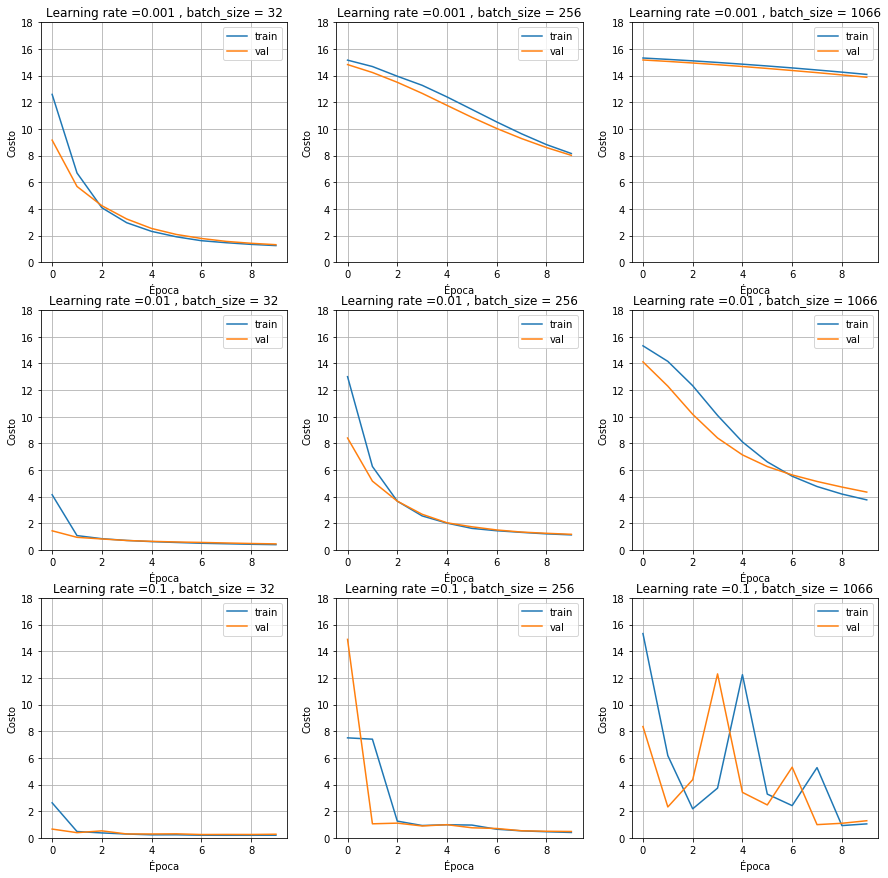

In [31]:
learning_rates = [1e-3,1e-2,1e-1]  # se definen las tasas de aprendizaje a probar
batch_sizes = [32, 256, X_train.shape[0]]  # se definen los tamaños de batch a probar

plt.figure(figsize = (15,15))
for i, lr in enumerate(learning_rates):
    for j, bs in enumerate(batch_sizes):
        ax = plt.subplot(3,3,3*i+j+1)
        
        # Se entrena la red durante 10 épocas con tasa de aprendizaje lr y tamaño de batch bs 
        parametros_red_3capas = red_tres_capas(X_train_std, y_train, dims_capas = [d_0, d_1, d_2, d_3], 
                                    learning_rate = lr, num_epochs = 10, batch_size=bs, 
                                    mostrar_costo=True, X_val = X_val_std, Y_val=y_val, axis=ax, ylim=(0,18))
        

### Parte k)

Asumiendo que al ejecutar la celda anterior obtuvo la gráfica que se muestra a continuación, comente cómo influyen el *learning rate* y el tamaño de *batch* en la optimización. En particular comente *pros* y *contras* de utilizar valores grandes y chicos de ambos hiperparámetros.

<img src="img/lr_batch.png" alt="drawing" width="800"/>

**Respuesta:**   

Mientras mayor es el valor del learning rate, más rápido se converge a la solución, es decir, se minimiza el costo más rápidamente. Sin embargo, dar un valor muy grande de learning rate puede hacer que la solución vaya cambiando de mínimo local al que converge, demorando la convergencia y obteniendo una curva de aprendizaje menos suave, dado que cada iteración modifica en mayor medida los parámetros.

En cuanto al tamaño del batch, mientras más chico más rápido (en iteraciones) converge la solución, dado que se actualizan más veces los parámetros por época y más fina es esa actualización. Sin embargo, esto tiene un costo computacional mayor, debido a este aumento de calculos y actualizaciones (numpy esta optimizado para hacer cuentas matriciales). Aumentar el tamaño del batch mejora el rendimiento computacional, pero resulta en una convergencia más lenta y torpe, dado que en una época puede que los batchs se agrupen de forma desfavorable y generen ruido en la actualización. Ver el cuadro de abajo a la derecha para observar como el error se comporta de forma extraña según la época debido a los batchs.

### Entrenamiento de la red

La siguiente celda entrena durante 1000 épocas utilizando un *learning rate* de 0.01 y un tamaño de *batch*  igual a 32. La corrida puede demorar un par de minutos.

Epoca 0: costo entrenamiento = 4.148, costo validación = 1.442
Epoca 50: costo entrenamiento = 0.168, costo validación = 0.232
Epoca 100: costo entrenamiento = 0.140, costo validación = 0.224
Epoca 150: costo entrenamiento = 0.123, costo validación = 0.220
Epoca 200: costo entrenamiento = 0.107, costo validación = 0.220
Epoca 250: costo entrenamiento = 0.095, costo validación = 0.220
Epoca 300: costo entrenamiento = 0.085, costo validación = 0.218
Epoca 350: costo entrenamiento = 0.076, costo validación = 0.226
Epoca 400: costo entrenamiento = 0.069, costo validación = 0.226
Epoca 450: costo entrenamiento = 0.064, costo validación = 0.238
Epoca 500: costo entrenamiento = 0.058, costo validación = 0.236
Epoca 550: costo entrenamiento = 0.052, costo validación = 0.237
Epoca 600: costo entrenamiento = 0.047, costo validación = 0.254
Epoca 650: costo entrenamiento = 0.044, costo validación = 0.253
Epoca 700: costo entrenamiento = 0.040, costo validación = 0.257
Epoca 750: costo entrenamien

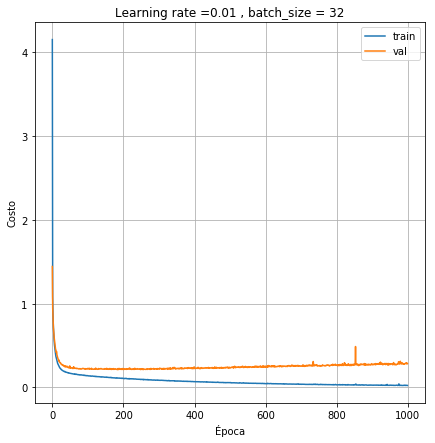

In [32]:
fig = plt.figure(figsize=(7,7))
parametros_red_3capas = red_tres_capas(X_train_std, y_train, dims_capas = [d_0, d_1, d_2, d_3], 
                                    learning_rate = 1e-2, num_epochs = 1000, batch_size=32, 
                                    mostrar_costo=True,  X_val = X_val_std, Y_val=y_val, 
                                     axis=plt.gca())

La siguiente celda muestra cómo se ajustan los datos al conjunto de entrenamiento y al conjunto de test.

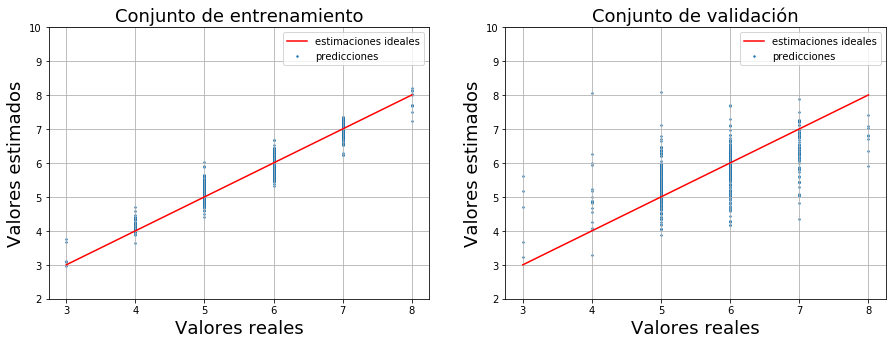

In [33]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
mostrar_ajuste(y_train, predecir_calidad(X_train_std, parametros_red_3capas), ax, 'Conjunto de entrenamiento')
ax = plt.subplot(1,2,2)
mostrar_ajuste(y_val, predecir_calidad(X_val_std, parametros_red_3capas), ax, 'Conjunto de validación')

### Parte l)

Estime el promedio de las diferencias  (valores absolutos de las diferencias) entre los valores estimados y los reales para los conjuntos de entrenamiento y validación.

$$
MAE = \frac{1}{N}\sum_{i=1}^N   |y_i - \hat{y_i}|
$$

$N$ es el número de muestras del conjunto, $y_i$ es la calidad de la *i-ésima* muestra y $\hat{y}_i$ es el valor estimado para la *i-ésima* muestra.  

In [34]:
####################################################################################
###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################

# Se calcula el MAE entre las predicciones y los valores reales para el conjunto de entrenamiento
diff_train = abs(y_train - predecir_calidad(X_train_std, parametros_red_3capas))

print('El error en la predicción en entrenamiento es %.03f' % (diff_train.mean()))

# Se calcula el MAE entre las predicciones y los valores reales para el conjunto de validación
diff_val = abs(y_val - predecir_calidad(X_val_std, parametros_red_3capas))

print('El error en la predicción en validación es %.03f' % (diff_val.mean()))

####################################################################################
###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################

El error en la predicción en entrenamiento es 0.159
El error en la predicción en validación es 0.547


### Parte m)
Comente sobre el punto de funcionamiento de la red y proponga al menos **tres estrategias** que a su criterio podrían contribuir a obtener una red que produzca mejores resultados en producción que la entrenada en este ejercicio. 

El punto de funcionamiento no parece ser el ideal, dado que hay una diferencia de 0.4 entre el error de validación y el error de entrenamient($E_{in}$). Esto quiere decir que el modelo se esta ajustando de más a los datos. Para mejorar este aspecto es necesario variar los hiperparámetros, en particular el número de iteraciones (lo que en redes neuronales se llama early stop), el learning rate y el batch size.

No hay una ciencia exacta para la elección de hiperparámetros, sino que se tiene que entrenar el modelo y ver el resultado (si se puede hacer una elección cualitativa pero siempre es tiene que verificar luego con el modelo). El resultado que se observa es el error de validación, al cual queremos minimizar.

Una extrategia, explicada en otro ejercicio mas adelante, es la validación cruzada, que tiene la ventaja que no se precisa separar un conjunto de datos especialmente para validación. Scikit learn cuenta clases que se encargan de hacer la busqueda de los hiperparámetros óptimos. Cabe destacar que si se tiene un conjunto muy grande de datos esta busqueda combiene hacerla con un subconjunto de esos datos, dado que requiere que se entrenen los modelos muchas veces con distintos parámetros.

